# Tessellation
Create an Escher lizard tesselation
http://mathstat.slu.edu/escher/index.php/Tessellations_by_Recognizable_Figures


In [91]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

import pandas as pd
import numpy as np
from matplotlib.pyplot import *

from matplotlib import animation, rc
from IPython.display import HTML
from math import *

Using the raw data from [Instructables: Tesselating lizard](http://www.instructables.com/id/Tessellating-Lizards/?ALLSTEPS). This data is not properly tessellated!

In [97]:
raw_lizard = pd.read_csv('lizard.csv')
raw_lizard.head()

,x,y
0,316.750,6.625
1,329.000,59.875
2,310.125,111.875
3,284.625,127.375
4,237.000,110.750


In [125]:
# First coordinate is rotation point
# http://scipython.com/book/chapter-6-numpy/examples/creating-a-rotation-matrix-in-numpy/
def rotate(coords, angle):
    new_coord = coords - coords[0]
     
    c = np.cos(np.radians(angle))
    s = np.sin(np.radians(angle))
    R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
    
    for i in range(len(new_coord)):
        new_coord[i] = new_coord[i]*R
        
    return new_coord + coords[0]

(0.0, 500.0, 0.0, 450.0)

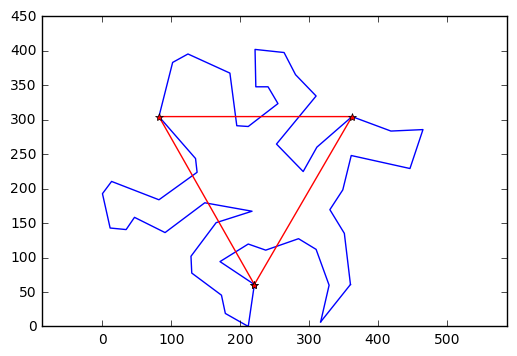

In [109]:
# show that verticies 8, 26 and 42 almost form an equilateral triangle
triangle_indeces = [7, 25, 41, 7]
close_indeces = [len(raw_lizard)-1, 0]

plot(raw_lizard['x'], raw_lizard['y'], 'b')
plot(raw_lizard['x'][close_indeces], raw_lizard['y'][close_indeces], 'b')
plot(raw_lizard['x'][triangle_indeces], raw_lizard['y'][triangle_indeces], 'r-*')
axis('equal')

(0.0, 500.0, 0.0, 450.0)

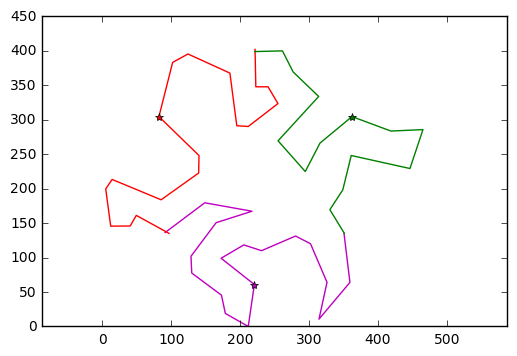

In [126]:
part1 = raw_lizard[7:(7+10)].values
part2 = raw_lizard[25:(25+10)].values
part3 = raw_lizard[41:(41+8)].values

rot_part1 = rotate(part1, 120.0)
rot_part2 = rotate(part2, 120.0)
rot_part3 = rotate(part3, 120.0)

plot(part1[:,0], part1[:,1], 'm')
plot(rot_part1[:, 0], rot_part1[:, 1], 'm')
plot(rot_part1[0, 0], rot_part1[0, 1], '*m')

plot(part2[:,0], part2[:,1], 'r')
plot(rot_part2[:, 0], rot_part2[:, 1], 'r')
plot(rot_part2[0, 0], rot_part2[0, 1], '*r')

plot(part3[:,0], part3[:,1], 'g')
plot(rot_part3[:, 0], rot_part3[:, 1], 'g')
plot(rot_part3[0, 0], rot_part3[0, 1], '*g')

axis('equal')

In [131]:
print(part1[0])
print(part2[0])
print(part3[0])

print('Length 1,2: ' + str(np.linalg.norm(part1[0]-part2[0])))
print('Length 2,3: ' + str(np.linalg.norm(part2[0]-part3[0])))
print('Length 3,1: ' + str(np.linalg.norm(part3[0]-part1[0])))

[ 220.5     60.875]
[  82.     304.625]
[ 362.25   304.625]
Length 1,2: 280.350338862
Length 2,3: 280.25
Length 3,1: 281.9700782
